# Atividade 1

## Aluno

- Daniel Moraes (dmms@cesar.school)

## Instalação de Pacotes

In [1]:
%pip install pandas
%pip install statsmodels
%pip install matplotlib
%pip install "numpy<2"
%pip install pmdarima
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Análise dos Dados

In [2]:
import pandas as pd

In [ ]:
test_df = pd.read_csv('./data/DailyDelhiClimateTest.csv',
                      index_col='date', parse_dates=True)
test_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
test_df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [5]:
test_df.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [6]:

train_df = pd.read_csv('./data/DailyDelhiClimateTrain.csv',
                       index_col='date', parse_dates=True)
train_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
train_df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
train_df.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

## Comportamento da Série Temporal

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

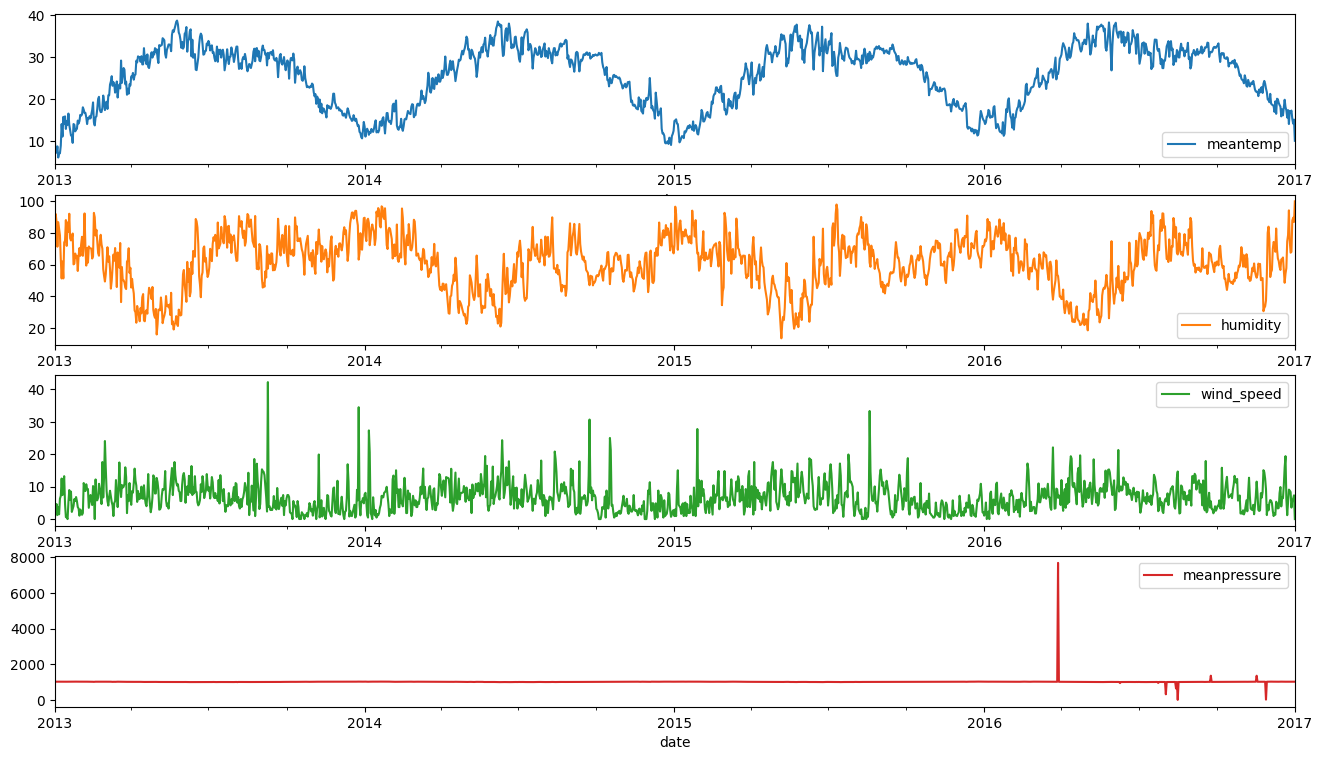

In [9]:
train_df.plot(subplots=True, figsize=(16, 9), sharex=False)

### Limpeza da Coluna [MeanPressure]

In [10]:
train_df['meanpressure'].describe()

count    1462.000000
mean     1011.104548
std       180.231668
min        -3.041667
25%      1001.580357
50%      1008.563492
75%      1014.944901
max      7679.333333
Name: meanpressure, dtype: float64

In [11]:
test_df['meanpressure'].describe()

count     114.000000
mean     1004.035090
std        89.474692
min        59.000000
25%      1007.437500
50%      1012.739316
75%      1016.739583
max      1022.809524
Name: meanpressure, dtype: float64

Ao analisar os valores máximo e mínimo, supõe-se que ambos estejam errados, pois a maior pressão atmosférica já registrada foi de 1083hPa e a menor de 870hPa.\
Fonte: [Pressão Atmosférica](https://pt.wikipedia.org/wiki/Press%C3%A3o_atmosf%C3%A9rica#Registros)\
Para simplificar o processo, serão removidos os registros com valores acima ou abaixo dos valores 870 e 1083.

#### Limpeza do DataFrame de Treino

In [12]:
train_error = train_df[(train_df['meanpressure'] < 870)
                       | (train_df['meanpressure'] > 1083)]
df_train = train_df.drop(train_error.index, axis=0)
df_train['meanpressure'].describe()

count    1455.000000
mean     1008.178187
std         7.827299
min       938.066667
25%      1001.625000
50%      1008.571429
75%      1014.906250
max      1023.000000
Name: meanpressure, dtype: float64

#### Limpeza do DataFrame de Teste

In [13]:
test_error = test_df[(test_df['meanpressure'] < 870) |
                     (test_df['meanpressure'] > 1083)]
df_test = test_df.drop(test_error.index, axis=0)
df_test['meanpressure'].describe()

count     113.000000
mean     1012.398232
std         5.709981
min       998.625000
25%      1007.500000
50%      1012.923077
75%      1016.777778
max      1022.809524
Name: meanpressure, dtype: float64

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

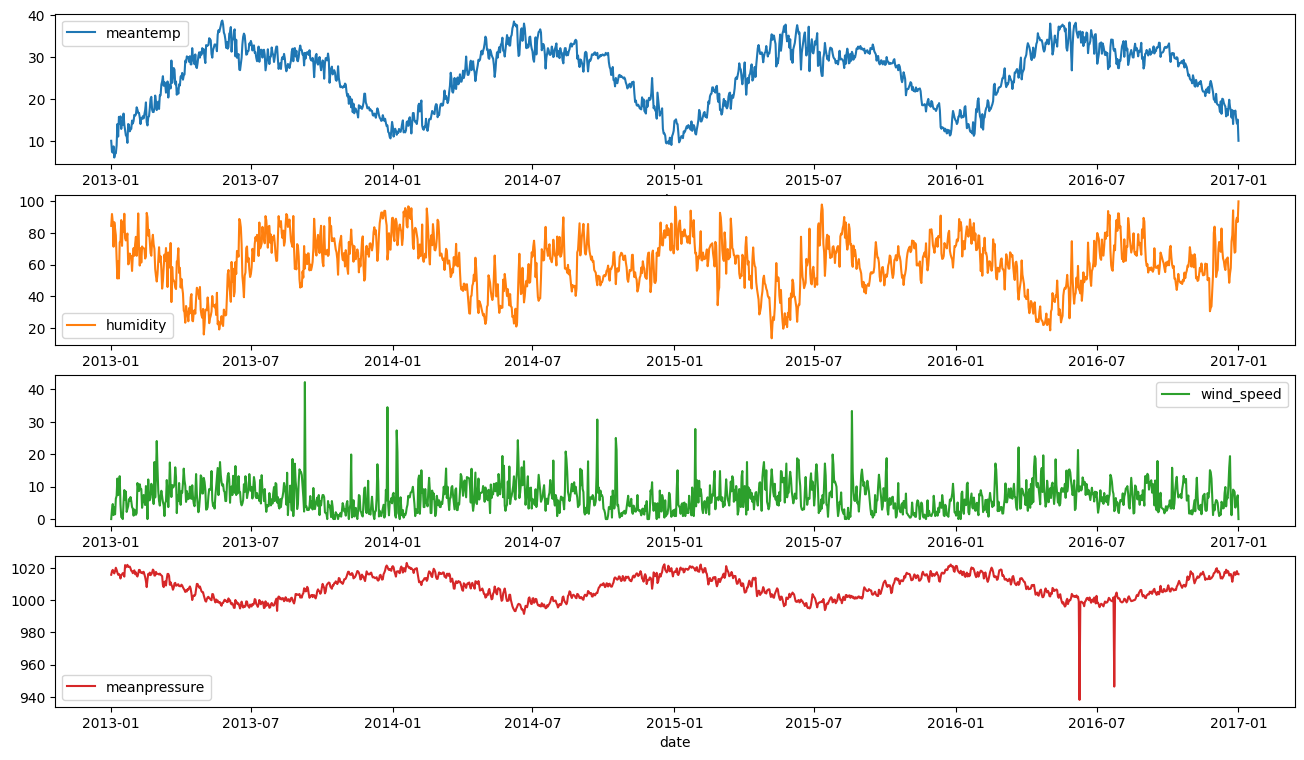

In [14]:
df_train.plot(subplots=True, figsize=(16, 9), sharex=False)

## ACF / PACF

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

### Temperatura Média

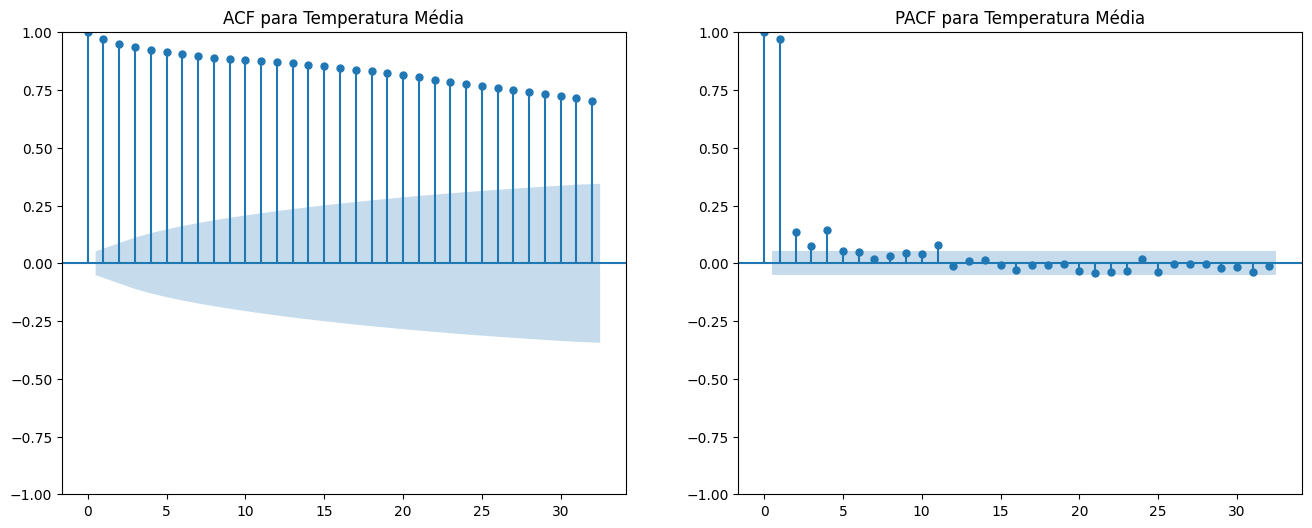

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df_train['meantemp'], ax=axes[0], title='ACF para Temperatura Média')

plot_pacf(df_train['meantemp'], ax=axes[1],
          title='PACF para Temperatura Média')
plt.show()

### Umidade

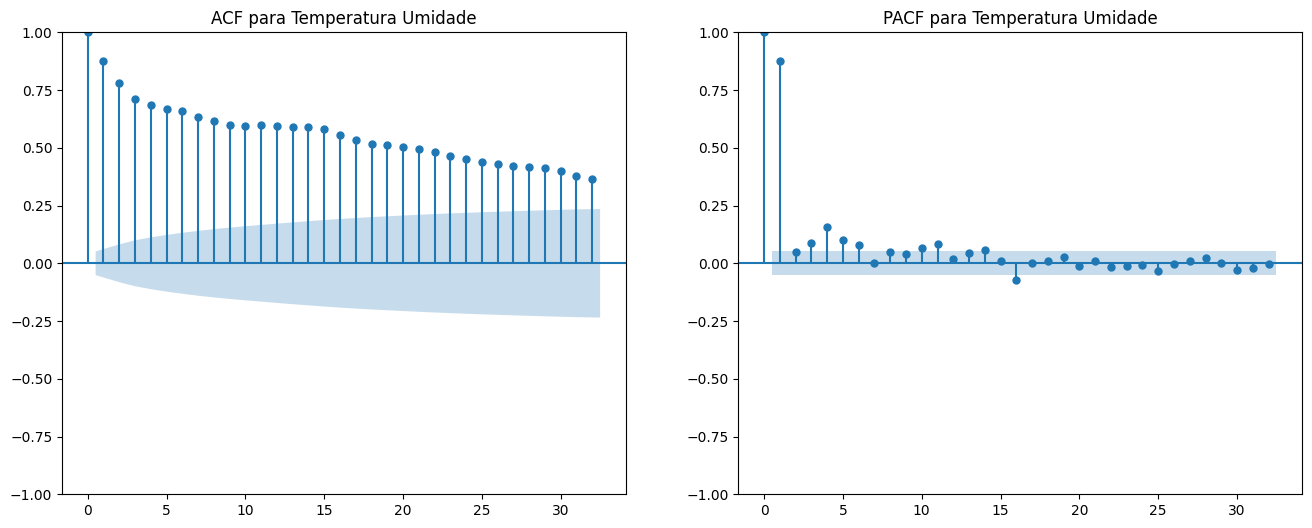

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df_train['humidity'], ax=axes[0],
         title='ACF para Temperatura Umidade')

plot_pacf(df_train['humidity'], ax=axes[1],
          title='PACF para Temperatura Umidade')
plt.show()

### Velocidade do Vento

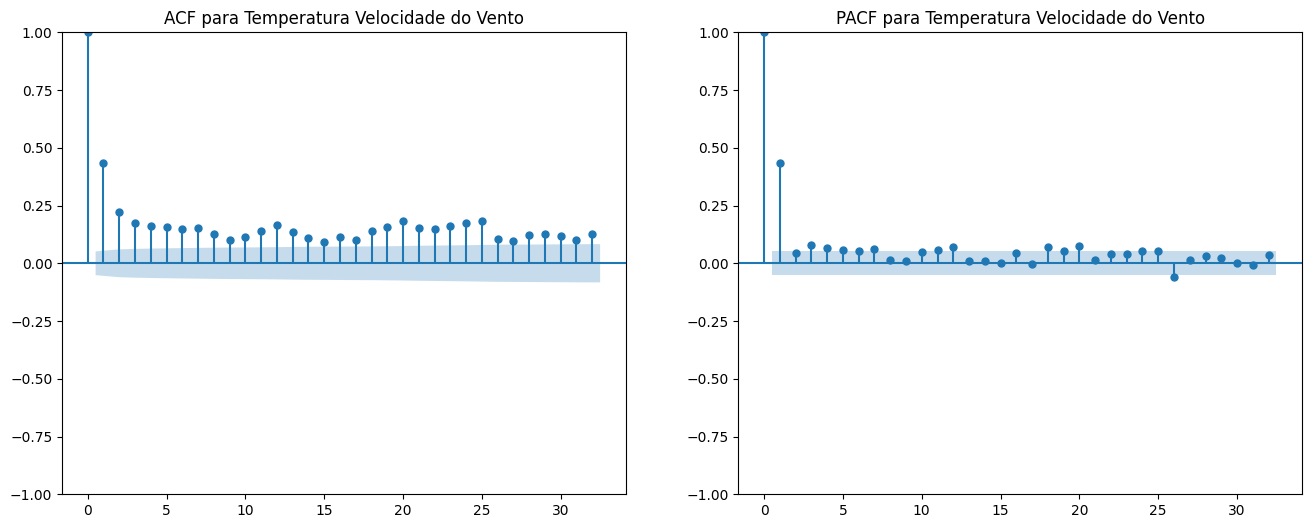

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df_train['wind_speed'], ax=axes[0],
         title='ACF para Temperatura Velocidade do Vento')

plot_pacf(df_train['wind_speed'], ax=axes[1],
          title='PACF para Temperatura Velocidade do Vento')
plt.show()

### Pressão Média

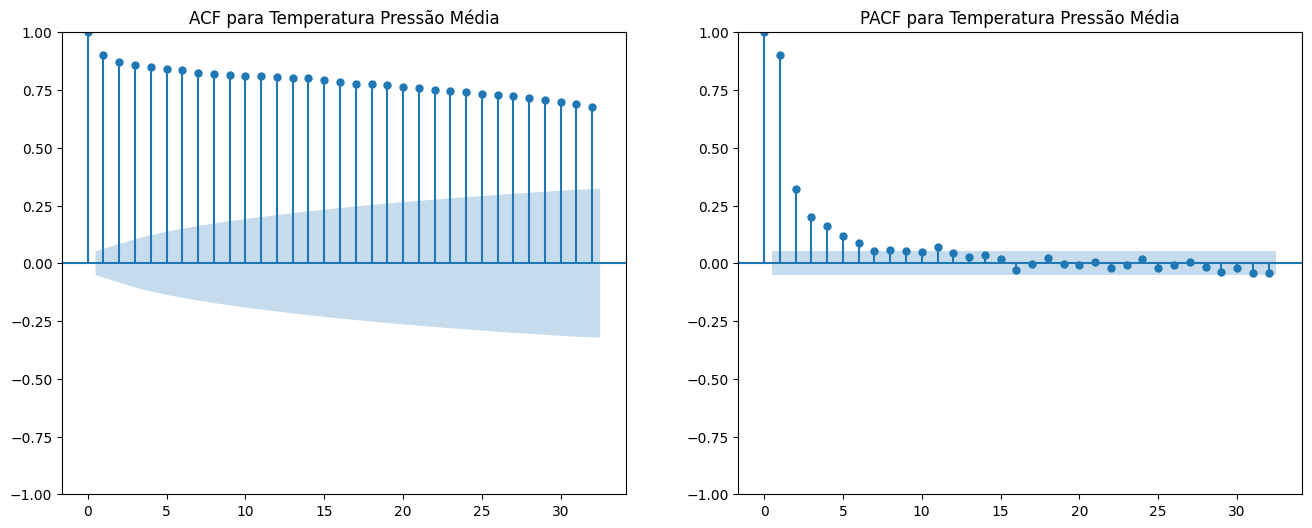

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df_train['meanpressure'], ax=axes[0],
         title='ACF para Temperatura Pressão Média')

plot_pacf(df_train['meanpressure'], ax=axes[1],
          title='PACF para Temperatura Pressão Média')
plt.show()

## Teste KPSS 

In [20]:
from pmdarima.arima import KPSSTest
import warnings
warnings.filterwarnings("ignore")
warnings.warn("This will not show.")

In [21]:
def print_kpss_result(serie, title):
    kpss = KPSSTest()
    print(f'KPSS Test para {title}:\n')
    print(f'Necessita Diferenciação: {kpss.should_diff(serie)}')

In [22]:
print_kpss_result(df_train['meantemp'], 'Temperatura Média')

KPSS Test para Temperatura Média:

Necessita Diferenciação: (0.026043920063212152, True)


### Realizando a Diferenciação

In [23]:
df_train['meantemp_diff'] = df_train['meantemp'].diff().fillna(0)
df_train.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_diff
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,0.000000
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [24]:
print_kpss_result(df_train['meantemp_diff'], 'Temperatura Média')

KPSS Test para Temperatura Média:

Necessita Diferenciação: (0.1, False)


### ACF / PACF

#### Lag 1

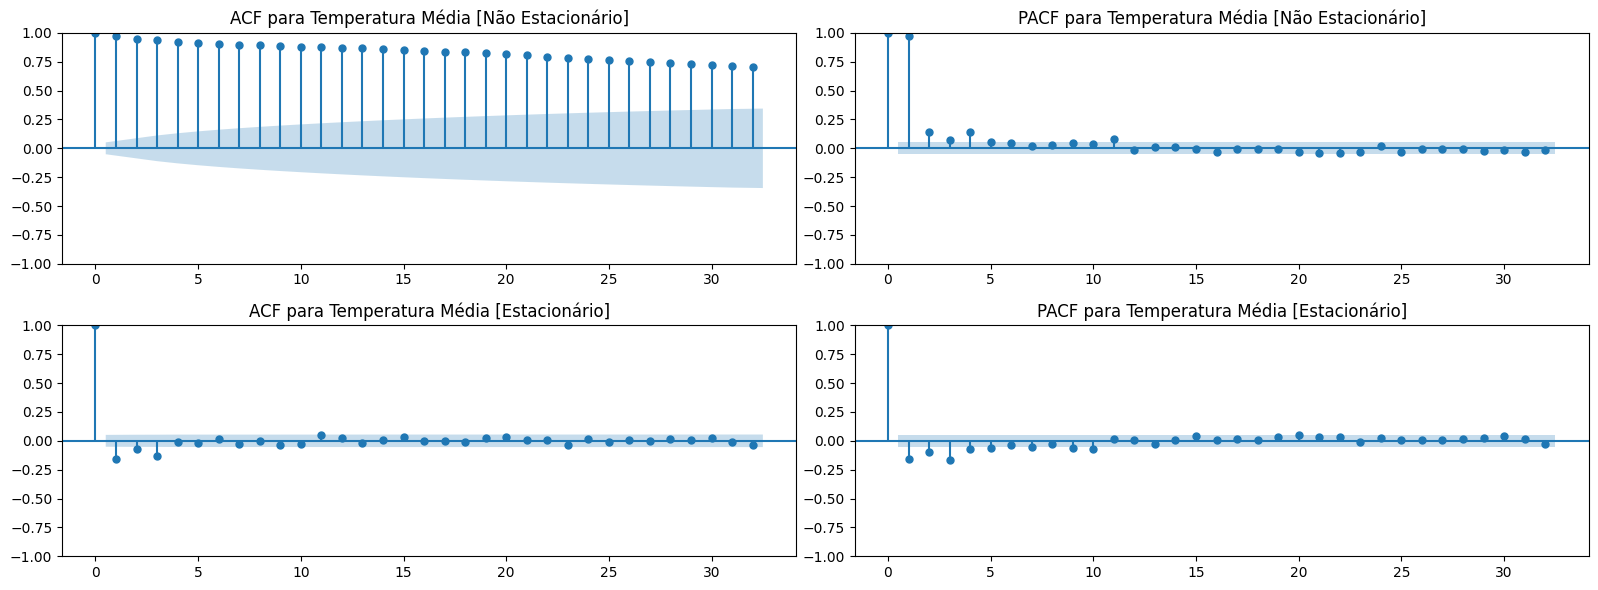

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))

plot_acf(df_train['meantemp'], ax=axes[0, 0],
         title='ACF para Temperatura Média [Não Estacionário]')
plot_pacf(df_train['meantemp'], ax=axes[0, 1],
          title='PACF para Temperatura Média [Não Estacionário]')
plot_acf(df_train['meantemp_diff'], ax=axes[1, 0],
         title='ACF para Temperatura Média [Estacionário]')
plot_pacf(df_train['meantemp_diff'], ax=axes[1, 1],
          title='PACF para Temperatura Média [Estacionário]')
plt.tight_layout()
plt.show()

#### Lag 10

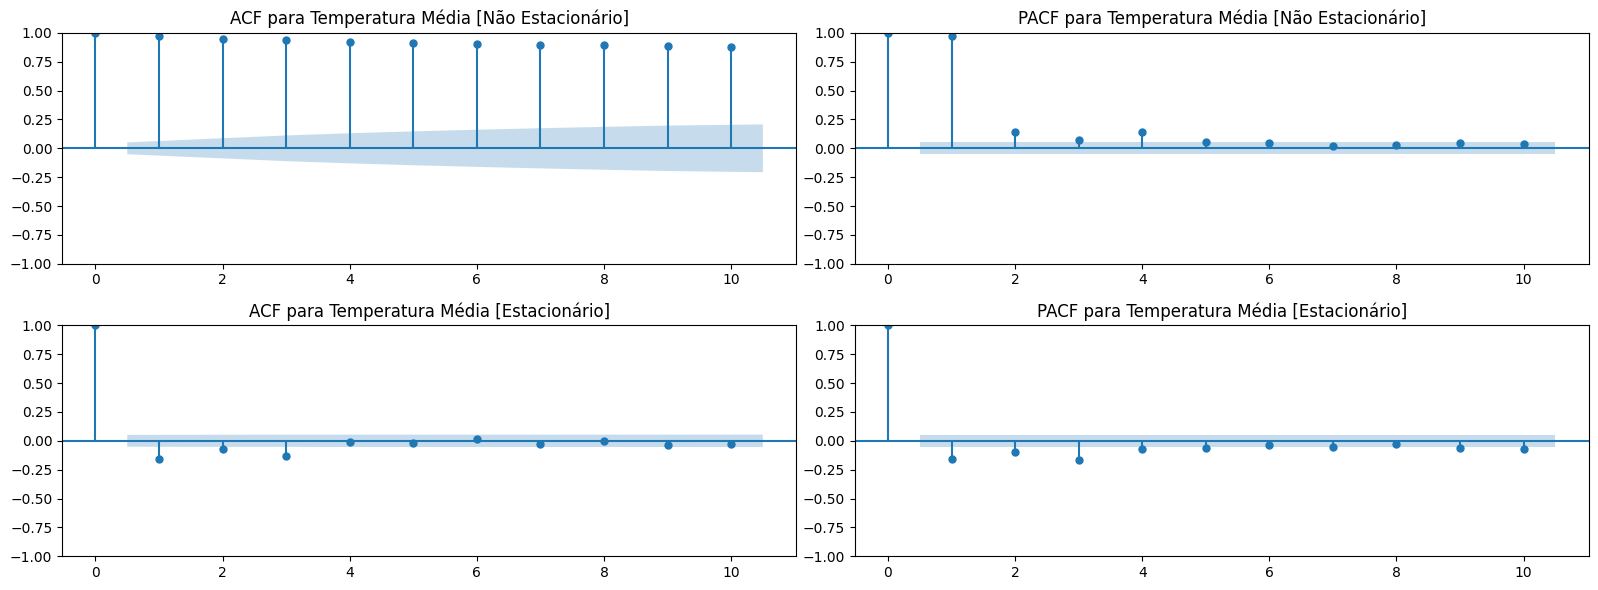

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))

plot_acf(df_train['meantemp'], ax=axes[0, 0], lags=10,
         title='ACF para Temperatura Média [Não Estacionário]')
plot_pacf(df_train['meantemp'], ax=axes[0, 1], lags=10,
          title='PACF para Temperatura Média [Não Estacionário]')
plot_acf(df_train['meantemp_diff'], ax=axes[1, 0], lags=10,
         title='ACF para Temperatura Média [Estacionário]')
plot_pacf(df_train['meantemp_diff'], ax=axes[1, 1], lags=10,
          title='PACF para Temperatura Média [Estacionário]')
plt.tight_layout()
plt.show()

## Modelos

In [34]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [28]:
lag_ar = 1
horizon = 2
ts = df_train['meantemp_diff']
test_size = int(len(ts) * 0.3)
lag = 12

X_train, X_test = ts[:-(test_size + horizon - 1)], ts[-(test_size+1):]

In [37]:
autoreg_model = AutoReg(X_train, lags=lag)
autoreg_results = autoreg_model.fit()
autoreg_preds = autoreg_results.predict(start=len(X_train),
                                        end=len(X_train) + len(X_test) - 1,
                                        dynamic=False)
mse = mean_squared_error(X_test, autoreg_preds)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

MSE: 2.5266
RMSE: 1.5895


In [39]:
arima_run = auto_arima(
    df_train['meantemp'],
    start_p=1, max_p=5,
    d=None, max_d=1,
    start_q=1, max_q=5,
    start_P=1, max_P=5,
    start_Q=1, max_Q=5,
    D=None, max_D=1, m=12,
    stepwise=True, trace=True, max_iter=30
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5524.302, Time=2.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5630.253, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5595.935, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5583.953, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5628.253, Time=0.03 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5525.046, Time=1.58 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5524.973, Time=1.27 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=5526.190, Time=9.68 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5526.182, Time=9.99 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5524.814, Time=0.37 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5526.522, Time=7.98 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=5526.340, Time=5.42 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=5528.280, Time=9.97 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5585.610, Time=1.18 sec
 ARIMA(1,1,0)(1,0,1